# Get started

This tutorial introduce the usage of BELLHOP, RAM and KRAKEN.

## Model use case

Refer to the following table to choose an available model depending on your application.

<table>
  <thead>
    <tr>
      <th colspan="1">Model type</th>
      <th colspan="8">Applications</th>
    </tr>
    <tr>
      <th colspan="1"></th>
      <th colspan="4">Shallow water</th>
      <th colspan="4">Deep water</th>
    </tr>
    <tr>
      <th colspan="1"></th>
      <th colspan="2">Low Frequency</th>
      <th colspan="2">High Frequency</th>
      <th colspan="2">Low Frequency</th>
      <th colspan="2">High Frequency</th>
    </tr>
    <tr>
      <th colspan="1"></th>
      <td colspan="1">Range Independant</td>
      <td colspan="1">Range Dependant</td>
      <td colspan="1">Range Independant</td>
      <td colspan="1">Range Dependant</td>
      <td colspan="1">Range Independant</td>
      <td colspan="1">Range Dependant</td>
      <td colspan="1">Range Independant</td>
      <td colspan="1">Range Dependant</td>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Ray theory</td>
      <td>-</td>
      <td>-</td>
      <td>?!</td>
      <td>BELLHOP</td>
      <td>?!</td>
      <td>?!</td>
      <td>BELLHOP</td>
      <td>BELLHOP</td>
    </tr>
    <tr>
      <td>Normal mode</td>
      <td>KRAKEN</td>
      <td>?!</td>
      <td>KRAKEN</td>
      <td>?!</td>
      <td>KRAKEN</td>
      <td>?!</td>
      <td>?!</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Multipath Extension</td>
      <td>-</td>
      <td>-</td>
      <td>?!</td>
      <td>?!</td>
      <td>?!</td>
      <td>?!</td>
      <td>X</td>
      <td>?!</td>
    </tr>
    <tr>
      <td>Fast field</td>
      <td>X</td>
      <td>?!</td>
      <td>X</td>
      <td>?!</td>
      <td>X</td>
      <td>?!</td>
      <td>?!</td>
      <td>?!</td>
    </tr>
    <tr>
      <td>Parabolic equation</td>
      <td>?!</td>
      <td>RAM</td>
      <td>-</td>
      <td>-</td>
      <td>?!</td>
      <td>RAM</td>
      <td>?!</td>
      <td>?!</td>
    </tr>
  </tbody>
</table>

    -  : Neither applicable or practical
    ?! : Limitation in accuracy or in speed of execution
    X  : Applicable and practical but no model available in this module
    
## Basic settings

Settings are shared through the usage of a dictionnary that defines the environment. This env is compatible with all the models, but some of the elements of the dictionnary are dedicated to only one ore more models.

The source is always located at range 0. The propagation models are commonly dedicated to right propagation only.  Left propagation is done by flipping the environment, in this case left and right propagation ignore each other effects. This process can generate some artifacts. BELLHOP always propagates both. It is recommended to give environment settings for left part of a BELLHOP env as far as right propagation goes and vice-versa.

For depth/range dependant settings, the vertical dimension correspond to the depth and the horizontal to the range. Increasing depth and range are respectively toward the bottom and the right. All the data must be monotically increasing range and depth ordered.

Top/Bottom interface, Tx beam, SSP or Bottom settings grids do not require to be equally spaced. For better results prefer a definition of the environment a little bit larger/deeper than the results grid. Settings should also overlap to avoid computation failure. 

***By default settings will be automatically padded, env['pad_inputData']=True.***

In [1]:
import arlpy.uwapm as pm
import numpy as np

### Receiver grid

Rx grid is in meter and must be equally spaced, for better RAM results it should also pass by zero.

In [2]:
rx_range = np.linspace(0, 7500, 1080)
rx_depth = np.linspace(0, 2000,  720)

### SSP

The sound speed profile can be a single value or an array (1D or 2D) expressed in m/s. 
The corresponding range and depth are given in m in separate arrays.

In [3]:
ssp_range = None
ssp_depth = np.array([0, 500, 1000, 1500, 2000])
ssp       = np.vstack([1500, 1550, 1450, 1500, 1550]) # Depth dependant only SSP

### Bottom interface

The bottom interface is given as two horizontaly stacked columns. The first one contains the range in m, and the second one the bathymetry in m.

In [4]:
bot_interface = np.column_stack((None, 1800)) # Constant depth at 1800m

### Bottom settings

#### RAM

RAM always requires the following bottom settigs:

    - range      = m
    - depth      = m
    - density    = g/cm3
    - PwaveAttn  = dB/wavelength
    - PwaveSpeed = m/s

Range and depth correspond to the settings position.

#### OALIB Acousto-Elastic

For OALIB models, when set to acousto-elastic, top or bottom boundary condition requires:

    - roughness   = m (rms)
    - density     = g/cm3
    - PwaveSpeed  = m/s 
    - SwaveSpeed  = m/s 
    - PwaveAttn   = dB/wavelength by default
    - SwaveAttn   = dB/wavelength by default

In [5]:
bot_range      = None # RAM: Not range dependant
bot_depth      = None # RAM: Not depth dependant
bot_density    = 2.5
bot_PwaveAttn  = 0.015
bot_PwaveSpeed = 6000
bot_roughness  = None
bot_SwaveSpeed = 3500 
bot_SwaveAttn  = 0.02 

## Make env

In [6]:
env = pm.make_env2d(
                
        name            = 'Notebook Tutorial',
        
        # ALL: Receiver positions
        rx_range        = rx_range,        # m
        rx_depth        = rx_depth,        # m
        
        # ALL: Source freq and depth
        tx_freq         = 25,              # Hz
        tx_depth        = 100,             # m

        # ALL: SSP
        ssp_range       = ssp_range,       # m
        ssp_depth       = ssp_depth,       # m
        ssp             = ssp,             # m/s

        # ALL: Bottom interface
        bot_interface   = bot_interface,   # [[m, m], ..., [m, m]]
                                                        
        # OALIB, RAM: acousto-elastic bottom boundary condition
        bot_boundary    = 'acousto-elastic',
        bot_range       = bot_range,       # m
        bot_depth       = bot_depth,       # m
        bot_roughness   = bot_roughness,   # m (rms)
        bot_density     = bot_density,     # g/cm3
        bot_PwaveSpeed  = bot_PwaveSpeed,  # m/s 
        bot_SwaveSpeed  = bot_SwaveSpeed,  # m/s 
        bot_PwaveAttn   = bot_PwaveAttn,   # dB/wavelength 
        bot_SwaveAttn   = bot_SwaveAttn,   # dB/wavelength 
    
)

## Model definition

In [7]:
BELLHOP = pm.BELLHOP(env)
KRAKEN  = pm.KRAKEN(env)
RAM     = pm.RAM(env)

## Compute and plot transmission loss

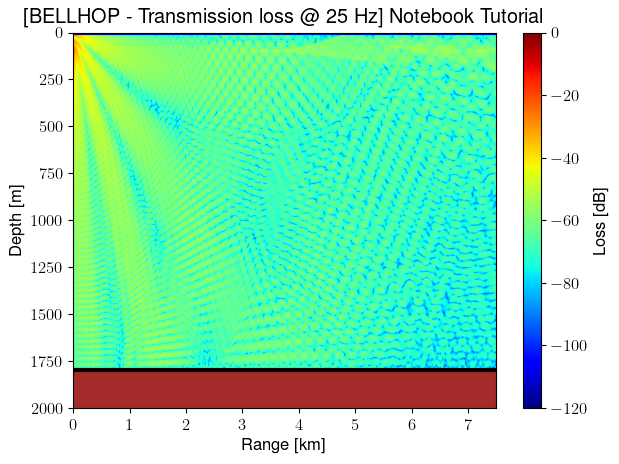

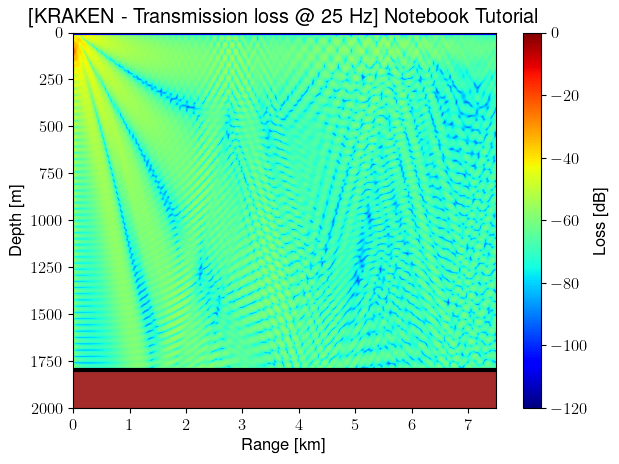

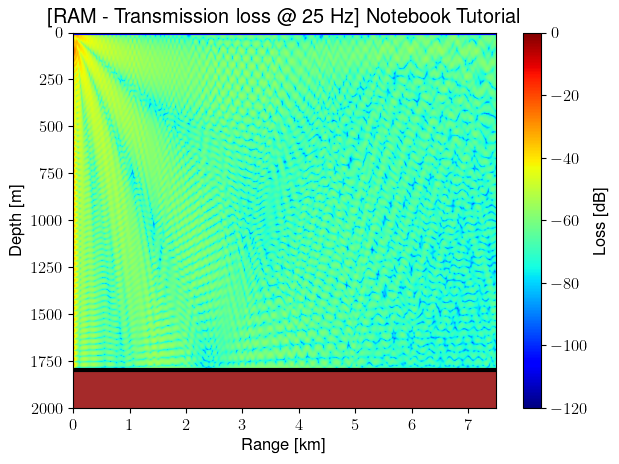

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[RAM - Transmission loss @ 25 Hz] Notebook Tutorial'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [8]:
BELLHOP.compute_transmission_loss()
KRAKEN.compute_transmission_loss()
RAM.compute_transmission_loss()
BELLHOP.plot_transmission_loss()
KRAKEN.plot_transmission_loss()
RAM.plot_transmission_loss()